# Определение перспективного тарифа для телеком компании

### Описание проекта

Вы аналитик компании федерального оператора сотовой связи.
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.
В вашем распоряжении данные 500 пользователей оператора: кто они, откуда, каким тарифом пользуются, сколько
звонков и сообщений каждый отправил за 2018 год.
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

	Тариф «Смарт»
	Ежемесячная плата: 550 рублей
	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
	Стоимость услуг сверх тарифного пакета:
	минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов.
	Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
	сообщение: 3 рубля
	1 Гб интернет-трафика: 200 рублей

	Тариф «Ультра»
	Ежемесячная плата: 1950 рублей
	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
	Стоимость услуг сверх тарифного пакета:
	минута разговора: 1 рубль
	сообщение: 1 рубль
	1 Гб интернет-трафика: 150 рублей

### Описание данных

**Таблица users (информация о пользователях):**  

	user_id — уникальный идентификатор пользователя
	first_name — имя пользователя
	last_name — фамилия пользователя
	age — возраст пользователя (годы)
	reg_date — дата подключения тарифа (день, месяц, год)
	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
	city — город проживания пользователя
	tariff — название тарифного плана

**Таблица calls (информация о звонках):**  

	id — уникальный номер звонка
	call_date — дата звонка
	duration — длительность звонка в минутах
	user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**  

	id — уникальный номер сообщения
	message_date — дата сообщения
	user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**  

	id — уникальный номер сессии
	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
	session_date — дата интернет-сессии
	user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**  

	tariff_name — название тарифа
	rub_monthly_fee — ежемесячная абонентская плата в рублях
	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
	messages_included — количество сообщений в месяц, включённых в абонентскую плату
	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    
***    

## Шаг 1. Изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
tables_names = ['calls', 'internet', 'messages', 'tariffs', 'users']

MyDF = type("MyDF", (object,), dict())
df = MyDF()

for name in tables_names:
    setattr(df, name, pd.read_csv('/datasets/{}.csv'.format(name)))

df.users = df.users.set_index('user_id')

In [2]:
for item in df.__dict__:
    print('\n Таблица:', item)
    getattr(df, item).info()



 Таблица: calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

 Таблица: internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB

 Таблица: messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

 Таблица: tariffs
<cla

In [3]:
for item in df.__dict__:
    print('\n Таблица:', item)
    print(getattr(df, item).isna().sum())


 Таблица: calls
id           0
call_date    0
duration     0
user_id      0
dtype: int64

 Таблица: internet
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

 Таблица: messages
id              0
message_date    0
user_id         0
dtype: int64

 Таблица: tariffs
messages_included        0
mg_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

 Таблица: users
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


Из представленной информации видно, что данные не имеют пропусков. Только в таблице Users наличиствуют пустые места в поле churn_date, но это информация о дате прекращения пользования тарифом. Если оно пустое, то на момент выгрузки данных тариф действовал.  

Смущает один момент - в некоторых таблицах поле id типа object.
Рассмотрим по несколько записей в каждой таблице.

In [4]:
for item in df.__dict__:
    print('\n Таблица:', item)
    print(getattr(df, item).head())


 Таблица: calls
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

 Таблица: internet
       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000

 Таблица: messages
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000

 Таблица: tariffs
   messages_included  mg_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_mess

Теперь понятно, что это некоторая внутренняя идентификация и которая не является числовым. Оставляем его как есть. 

Осталось преобразовать поля дат из `object` в `datetime`.  
Помимо этого, обнаружились нулевые данные в поле `duration` - длительность звонка и в поле `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах).

***

## Шаг 2. Подготовьте данные

#### Преобразование полей с датами

In [5]:
df.calls['call_date'] = pd.to_datetime(df.calls['call_date'], format='%Y-%m-%d')
df.internet['session_date'] = pd.to_datetime(df.internet['session_date'], format='%Y-%m-%d')
df.messages['message_date'] = pd.to_datetime(df.messages['message_date'], format='%Y-%m-%d')
df.users['reg_date'] = pd.to_datetime(df.users['reg_date'], format='%Y-%m-%d')

Также добавим в эти таблицы поле `month_` - это номер месяца, в котором было событие (звонок, сессия интернета, сообщение и регистрация).

In [6]:
df.calls['month_call'] = df.calls['call_date'].dt.month
df.internet['month_inet'] = df.internet['session_date'].dt.month
df.messages['month_msg'] = df.messages['message_date'].dt.month
df.users['month_reg'] = df.users['reg_date'].dt.month

#### Анализ поля `duration`

In [7]:
df.calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [8]:
df.calls.query('duration == 0').__len__()

39613

Нулевых звонков оказалось 39613 - это 19,55% от всех звонков.  
Вероятно, это не отвеченные звонки. В нашем исследовании они не нужны, поэтому удаляем.

In [9]:
df.calls = df.calls.query('duration > 0')

In [10]:
df.calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 5 columns):
id            162994 non-null object
call_date     162994 non-null datetime64[ns]
duration      162994 non-null float64
user_id       162994 non-null int64
month_call    162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.5+ MB


#### Анализ поля `mb_used`

In [11]:
df.internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [12]:
df.internet.query('mb_used == 0').__len__()

19598

19598 - это более 13% от всех данных по пользованию интернетом.  
Поскольку потраченного трафика было 0, то пользования интернетом не было. Значит такие данные нам не нужны.  

Почему эти данные попали в файл?  
Вероятнее всего, это происходит потому, что сессия возникает автоматически (возможно клиент сделал соответствующие настройки), когда клиент находится в поле доступа оператора сотовой связи, но не всегда за такую сессию клиент использует интернет.  

Удаляем такие данные.

In [13]:
df.internet = df.internet.query('mb_used > 0')

In [14]:
df.internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
month_inet      129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


***

## Шаг 3. Проанализируйте данные

Проведем следующий анализ данных: количество подключаемых абонентов ежемесячно, выручка по абонентской плате и за превышение лимитов, установленных абонентской платой, по каждому тарифному плану. Анализ статистических показателей.

In [15]:
#Таблица зарегистрировнных абонентов ежемесячно

users_pt = df.users.pivot_table(index='tariff', columns='month_reg', values='reg_date', aggfunc='count')
users_pt

month_reg,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,34,24,19,35,29,23,37,34,26,35,27,28
ultra,9,15,13,18,12,17,7,16,9,10,15,8


In [16]:
users_pt.T.mean()

tariff
smart    29.250000
ultra    12.416667
dtype: float64

Дополним эту таблицу данными с нарастающим итогом и общей абонентской платой.

In [17]:
users_fee_pt = df.users.pivot_table(index='tariff', columns='month_reg', values='reg_date', aggfunc='count') 
users_fee_pt_ultra = users_fee_pt.loc['ultra']
users_fee_pt = users_fee_pt.drop(['ultra'])
users_fee_pt.loc['smart_all'] = users_fee_pt.loc['smart']
for i in range(2, 13):
    users_fee_pt.loc['smart_all', i] = users_fee_pt.loc['smart_all', i - 1] + users_fee_pt.loc['smart_all', i]
users_fee_pt.loc['smart_all_fee'] = [a * 550 for a in users_fee_pt.loc['smart_all']]
users_fee_pt.loc['ultra'] = users_fee_pt_ultra
users_fee_pt.loc['ultra_all'] = users_fee_pt.loc['ultra']
for i in range(2, 13):
    users_fee_pt.loc['ultra_all', i] = users_fee_pt.loc['ultra_all', i - 1] + users_fee_pt.loc['ultra_all', i]
users_fee_pt.loc['ultra_all_fee'] = [a * 1950 for a in users_fee_pt.loc['ultra_all']]

users_fee_pt['sum'] = 0
for inx in users_fee_pt.index:
    users_fee_pt.loc[inx, 'sum'] = sum(users_fee_pt.loc[inx])
users_fee_pt.loc['smart_all', 'sum'] = users_fee_pt.loc['smart', 'sum']
users_fee_pt.loc['ultra_all', 'sum'] = users_fee_pt.loc['ultra', 'sum']
users_fee_pt

month_reg,1,2,3,4,5,6,7,8,9,10,11,12,sum
tariff,,,,,,,,,,,,,
smart,34,24,19,35,29,23,37,34,26,35,27,28,351
smart_all,34,58,77,112,141,164,201,235,261,296,323,351,351
smart_all_fee,18700,31900,42350,61600,77550,90200,110550,129250,143550,162800,177650,193050,1239150
ultra,9,15,13,18,12,17,7,16,9,10,15,8,149
ultra_all,9,24,37,55,67,84,91,107,116,126,141,149,149
ultra_all_fee,17550,46800,72150,107250,130650,163800,177450,208650,226200,245700,274950,290550,1961700


В представленной таблице строки `smart_all` и `ultra_all` - это накопленное количество абонентов. Т.е. в феврале цифра 58 показывает сумму количества абонентов, зарегистрировнных в январе и феврале.  

`smart_all_fee` и `ultra_all_fee` показывают суммарную абонентскую плату за месяц по соответствующему тарифу.

In [18]:
import matplotlib.pyplot as plt

axes = users_fee_pt.loc[['smart','ultra']].T[1:12].plot.bar()
axes.grid(color='lightgray', alpha=0.7)
axes.set_xlabel("Мес")
axes.set_ylabel("Кол-во абонентов")
plt.show();

<Figure size 640x480 with 1 Axes>

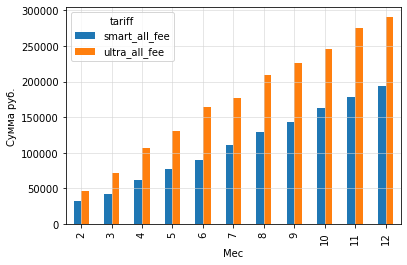

In [19]:
axes2 = users_fee_pt.loc[['smart_all_fee','ultra_all_fee']].T[1:12].plot.bar()
axes2.grid(color='lightgray', alpha=0.7)
axes2.set_xlabel("Мес")
axes2.set_ylabel("Сумма руб.")
axes2;

___Как видно из таблицы и графиков, число подключенных абонентов по тарифу `smart` составило 351 (в среднем 29 чел. в месяц), а по тарифу `ultra` составило 149 (в среднем 12 чел. в месяц). При этом выручка за абонентскую плату по второму тарифу оказался существенно больше, чем по первому тарифу (более чем в 1,5 раза).___  

#### Расчет перерасхода лимита продолжительности разговоров по месяцам и соответствующую выручку

In [20]:
# таблица суммарных разговоров для каждого клиента ежемесячно

calls_pt = df.calls.pivot_table(index='user_id', columns='month_call', 
                                values='duration', aggfunc=['sum'], fill_value=0, 
                                margins=True, margins_name='sum')

calls_pt['tariff'] = df.users['tariff']
calls_pt.dropna(inplace=True)
calls_pt.head()


sum                                                         \
month_call    1    2    3    4       5       6       7       8       9   
user_id                                                                  
1000        0.0  0.0  0.0  0.0  150.06  158.90  318.80  389.87  440.14   
1001        0.0  0.0  0.0  0.0    0.00    0.00    0.00    0.00    0.00   
1002        0.0  0.0  0.0  0.0    0.00  110.37  204.75  269.71  195.85   
1003        0.0  0.0  0.0  0.0    0.00    0.00    0.00  355.67  904.89   
1004        0.0  0.0  0.0  0.0   32.29  159.14  124.42  128.01  110.57   

                                            tariff  
month_call      10      11      12      sum         
user_id                                             
1000        328.45  319.04  312.98  2418.24  ultra  
1001          0.00  408.12  391.34   799.46  smart  
1002        199.48  228.03  222.98  1431.17  smart  
1003        809.07  775.39  755.50  3600.52  ultra  
1004        133.61  109.72  123.45   921.21  ultra

In [21]:
#суммарная продолжительность разговоров для каждого тарифа

calls_sum = calls_pt.groupby('tariff')['sum'].sum().to_frame()
calls_sum['calls_mean'] = calls_sum['sum'] / 12

calls_sum

,sum,calls_mean
tariff,,
smart,879177.84,73264.820000
ultra,489612.20,40801.016667


Найдем перерасход звонков по-месячно в соответствии с тарифным планом.

In [22]:
def get_parameter(tariff, parameter):
    aa = df.tariffs.query('tariff_name == "{}" '.format(tariff))[parameter]
    return aa.values[-1]


In [23]:
from math import ceil

for i in calls_pt.index:
    minutes_included = get_parameter(calls_pt.loc[i, 'tariff'][0], 'minutes_included')
    rub_per_minute = get_parameter(calls_pt.loc[i, 'tariff'][0], 'rub_per_minute')
    aa = 0
    for j in range(1, 13):
        if calls_pt.loc[i, ('sum', j)] > minutes_included:
            aa += ceil(calls_pt.loc[i, ('sum', j)] - minutes_included)
    calls_pt.loc[i, 'over'] = aa
    calls_pt.loc[i, 'revenue_over'] = aa * rub_per_minute
    
# в поле 'over' отображается время превышения лимита округленное вверх
# в поле 'revenue_over' отображается комиссия за время превышения лимита

In [24]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
calls_pt[calls_pt['over'] > 0].head()

sum                                                          \
month_call      1       2       3       4       5       6       7       8   
user_id                                                                     
1005        90.93  426.74  573.54  670.20  565.62  577.57  536.43  586.79   
1007         0.00    0.00    0.00  187.06  447.99  518.96  552.01  431.81   
1011         0.00    0.00  203.18  351.18  410.38  305.74  474.89  484.45   
1015         0.00    0.00    0.00    9.90  372.05  409.69  520.62  373.47   
1020         0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   

                                                    tariff   over revenue_over  
month_call       9      10      11      12      sum                             
user_id                                                                         
1005        447.17  684.89  523.34  559.43  6242.65  smart  782.0       2346.0  
1007        619.92  437.26  546.68  397.78  4139.47  smart  239.0        717.0  
1011        446.14  601.50  475.08  336.29  4088.83  smart  102.0        306.0  
1015        460.62  550.62  430.13  473.46  3600.56  smart   72.0        216.0  
1020          0.00  225.78  637.71  319.20  1182.69  smart  138.0        414.0

In [25]:
calls_pt_sum = calls_pt.pivot_table(index='tariff', values=['over', 'revenue_over'], aggfunc='sum')
calls_pt_sum.columns = ['over', 'revenue_over']
calls_pt_sum

,over,revenue_over
tariff,,
smart,68677.0,206031.0
ultra,0.0,0.0


___Таким образом, перерасход лимитов разговора свыше тарифных планов составил 68 677 мин., что принесло дополнительных доходов 206 031,00 руб. Причем, превышение было только по тарифу smart.___    
***

#### Посчитайте для каждого пользователя перерасход по интернет-трафику по месяцам и соответствующую выручку

In [26]:
internet_pt = df.internet.pivot_table(index='user_id', columns='month_inet', 
                                      values='mb_used', aggfunc=['sum'], fill_value=0, 
                                      margins=True, margins_name='sum')
internet_pt['tariff'] = df.users['tariff']
internet_pt.dropna(inplace=True)
internet_pt.tail()

sum                                                   \
month_inet        1         2        3         4         5         6   
user_id                                                                
1495           0.00      0.00      0.0      0.00      0.00      0.00   
1496        3762.73  28489.67  24959.0  21074.67  23709.75  20134.31   
1497           0.00      0.00      0.0      0.00      0.00      0.00   
1498           0.00      0.00      0.0      0.00      0.00      0.00   
1499           0.00      0.00      0.0      0.00      0.00      0.00   

                                                                        \
month_inet         7         8         9        10        11        12   
user_id                                                                  
1495            0.00   2614.07  33067.62  29363.00  38939.11  23426.76   
1496        24364.76  23530.03  26934.65  28183.17  25063.40  20736.15   
1497            0.00      0.00      0.00  11500.29  14156.08  19918.60   
1498         7476.24  24235.21  22134.41  20579.36      0.00      0.00   
1499            0.00      0.00   1845.75  17788.51  17963.31  13055.58   

                      tariff  
month_inet        sum         
user_id                       
1495        127410.56  ultra  
1496        270942.29  smart  
1497         45574.97  smart  
1498         74425.22  smart  
1499         50653.15  smart

In [27]:
for i in internet_pt.index:
    mg_per_month_included = get_parameter(internet_pt.loc[i, 'tariff'][0], 'mg_per_month_included')
    rub_per_gb = get_parameter(internet_pt.loc[i, 'tariff'][0], 'rub_per_gb')
    aa = 0
    for j in range(1, 13):
        over_sum = 0
        if internet_pt.loc[i, ('sum', j)] > mg_per_month_included:
            over_sum = internet_pt.loc[i, ('sum', j)] - mg_per_month_included
            aa += ceil(over_sum / 1000)
        internet_pt.loc[i, ('over_inet', j)] = over_sum
    internet_pt.loc[i, ('over_inet', 'sum')] = sum(internet_pt.loc[i, ('over_inet',1):('over_inet',12)])
    internet_pt.loc[i, 'revenue_over_inet'] = aa * rub_per_gb

In [28]:
internet_pt.head()

sum                                                         \
month_inet    1    2    3    4         5         6         7         8   
user_id                                                                  
1000        0.0  0.0  0.0  0.0   2253.49  23233.77  14003.64  14055.93   
1001        0.0  0.0  0.0  0.0      0.00      0.00      0.00      0.00   
1002        0.0  0.0  0.0  0.0      0.00  10856.82  17580.10  20319.26   
1003        0.0  0.0  0.0  0.0      0.00      0.00      0.00   8565.21   
1004        0.0  0.0  0.0  0.0  13403.98  17600.02  22229.58  28584.37   

                                                              tariff  \
month_inet         9        10        11        12        sum          
user_id                                                                
1000        14568.91  14702.49  14756.47   9817.61  107392.31  ultra   
1001            0.00      0.00  18429.34  14036.66   32466.00  smart   
1002        16691.08  13888.25  18587.28  18113.73  116036.52  smart   
1003        12468.87  14768.14  11356.89  10121.53   57280.64  ultra   
1004        15109.03  18475.44  15616.02  18021.04  149039.48  ultra   

           over_inet                                                          \
month_inet         1    2    3    4    5    6       7        8        9   10   
user_id                                                                        
1000             0.0  0.0  0.0  0.0  0.0  0.0     0.0     0.00     0.00  0.0   
1001             0.0  0.0  0.0  0.0  0.0  0.0     0.0     0.00     0.00  0.0   
1002             0.0  0.0  0.0  0.0  0.0  0.0  2220.1  4959.26  1331.08  0.0   
1003             0.0  0.0  0.0  0.0  0.0  0.0     0.0     0.00     0.00  0.0   
1004             0.0  0.0  0.0  0.0  0.0  0.0     0.0     0.00     0.00  0.0   

                                       revenue_over_inet  
month_inet       11       12       sum                    
user_id                                                   
1000           0.00     0.00      0.00               0.0  
1001        3069.34     0.00   3069.34             800.0  
1002        3227.28  2753.73  14491.45            3400.0  
1003           0.00     0.00      0.00               0.0  
1004           0.00     0.00      0.00               0.0

In [29]:
inet_sum = (
    internet_pt
        .groupby('tariff')
        .sum()
        .loc[:,[('sum', 'sum'), ('over_inet', 'sum'), ('revenue_over_inet', '')]]
)
inet_sum.columns = ['inet_sum', 'inet_over', 'revenue_over_inet']
inet_sum['inet_mean'] = inet_sum['inet_sum'] / 12
inet_sum.loc['sum'] = inet_sum.sum()

inet_sum

,inet_sum,inet_over,revenue_over_inet,inet_mean
tariff,,,,
smart,36128494.60,6142489.54,1362000.0,3.010708e+06
ultra,19176773.13,738787.90,120600.0,1.598064e+06
sum,55305267.73,6881277.44,1482600.0,4.608772e+06


___Таким образом, клиенты тарифного плана `smart` использовали интернет-трафик на 36 128 гб, тогда как клиенты `ultra` - 19 176 гб - разница почти в 2 раза!___  

___При этом, перерасход лимитов интернета свыше тарифных планов составил 6 881 гб, причем 90% из них приходится на клиентов тарифного плана `smart`.___  

___Похожая ситуация и с комиссией за перерасход трафика - здесь клиенты тарифного плана `smart` заплатили более чем в 10 раз больше!___
***

#### Посчитайте для каждого пользователя перерасход по сообщениям по месяцам и соответствующую выручку

In [30]:
messages_pt = df.messages.pivot_table(index='user_id', columns='month_msg', 
                                      values='id', aggfunc=['count'], fill_value=0, 
                                      margins=True, margins_name='sum')
messages_pt['tariff'] = df.users['tariff']
messages_pt.dropna(inplace=True)
messages_pt.head()

count                                                           \
month_msg     1   2   3   4   5    6    7    8    9   10   11   12   sum   
user_id                                                                    
1000          0   0   0   0  22   60   75   81   57   73   58   70   496   
1002          0   0   0   0   0    4   11   13    4   10   16   12    70   
1003          0   0   0   0   0    0    0   37   91   83   94   75   380   
1004          0   0   0   0  95  134  181  151  146  165  158  162  1192   
1005          7  38  56  41  42   47   56   64   52   44   51   54   552   

          tariff  
month_msg         
user_id           
1000       ultra  
1002       smart  
1003       ultra  
1004       ultra  
1005       smart

In [31]:
for i in messages_pt.index:
    messages_included = get_parameter(messages_pt.loc[i, 'tariff'][0], 'messages_included')
    rub_per_message = get_parameter(messages_pt.loc[i, 'tariff'][0], 'rub_per_message')
    aa = 0
    for j in range(1, 13):
        over_sum = 0
        if messages_pt.loc[i, ('count', j)] > messages_included:
            over_sum = messages_pt.loc[i, ('count', j)] - messages_included
            aa += over_sum
        messages_pt.loc[i, ('over_msg', j)] = over_sum
    messages_pt.loc[i, ('over_msg', 'sum')] = sum(messages_pt.loc[i, ('over_msg',1):('over_msg',12)])
    messages_pt.loc[i, 'revenue_over_msg'] = aa * rub_per_message

In [32]:
messages_pt.head()

count                                                           \
month_msg     1   2   3   4   5    6    7    8    9   10   11   12   sum   
user_id                                                                    
1000          0   0   0   0  22   60   75   81   57   73   58   70   496   
1002          0   0   0   0   0    4   11   13    4   10   16   12    70   
1003          0   0   0   0   0    0    0   37   91   83   94   75   380   
1004          0   0   0   0  95  134  181  151  146  165  158  162  1192   
1005          7  38  56  41  42   47   56   64   52   44   51   54   552   

          tariff over_msg                                                     \
month_msg               1    2    3    4    5    6    7     8    9   10   11   
user_id                                                                        
1000       ultra      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1002       smart      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1003       ultra      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1004       ultra      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1005       smart      0.0  0.0  6.0  0.0  0.0  0.0  6.0  14.0  2.0  0.0  1.0   

                     revenue_over_msg  
month_msg   12   sum                   
user_id                                
1000       0.0   0.0              0.0  
1002       0.0   0.0              0.0  
1003       0.0   0.0              0.0  
1004       0.0   0.0              0.0  
1005       4.0  33.0             99.0

In [33]:
msg_sum = (
    messages_pt
        .groupby('tariff')
        .sum()
        .loc[:,[('count', 'sum'), ('over_msg', 'sum'), ('revenue_over_msg', '')]]
)
msg_sum.columns = ['msg_count', 'msg_over', 'revenue_over_msg']
msg_sum.loc['sum'] = msg_sum.sum()

msg_sum

,msg_count,msg_over,revenue_over_msg
tariff,,,
smart,74413.0,12928.0,38784.0
ultra,48623.0,0.0,0.0
sum,123036.0,12928.0,38784.0


___Также, как и с телефонными звонками, перерасход лимита сообщений свыше тарифных планов обнаружилось только у клиентов тарифа `smart` и составило 12 928 шт., что принесло дополнительных доходов 38 784 руб.___  

In [34]:
smart_fee = users_fee_pt.loc['smart_all_fee', 'sum'] + calls_pt_sum.loc['smart', 'revenue_over'] + inet_sum.loc['smart', 'revenue_over_inet'] + msg_sum.loc['smart', 'revenue_over_msg']
ultra_fee = users_fee_pt.loc['ultra_all_fee', 'sum'] + inet_sum.loc['ultra', 'revenue_over_inet']
print('Доходы по тарифным планам:\n\tsmart - {:,.2f} руб.\n\tultra - {:,.2f} руб.'.format(smart_fee, ultra_fee))

Доходы по тарифным планам:
	smart - 2,845,965.00 руб.
	ultra - 2,082,300.00 руб.


___Если просуммировать доход по всем позициям (выручка за абонентскую плату + превышение лимита по звонкам + превышение интернет-трафика + превышение количество сообщений), то тарифный план `smart` выглядит намного привлекательней.___
    
***

#### Статистический анализ данных

Средняя продолжительность звонков: 8.401447164726795
Дисперсия: 28.59778540834216
Стандартное отклонение: 5.347689726259571


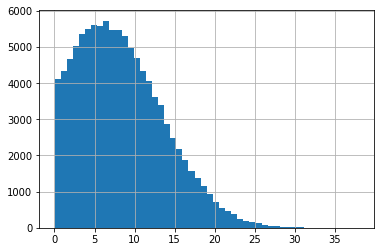

In [35]:
# Продолжительность звонков по тарифу smart

calls_smart = df.calls.join(df.users['tariff'], on='user_id').query('tariff == "smart"')['duration']
print('Средняя продолжительность звонков:', calls_smart.mean())
print('Дисперсия:', np.var(calls_smart))
print('Стандартное отклонение:', np.std(calls_smart))
calls_smart.hist(bins=50);

Всего звонков: 104646
Среднее количество: 299.85
Медиана: 257.00
Дисперсия: 38194.75
Стандартное отклонение: 195.43


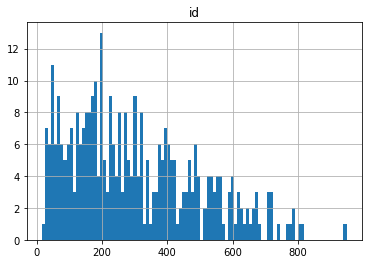

In [36]:
# Количество звонков каждого абонента тарифа smart

calls_smart_count = (
    df
    .calls
    .join(df.users['tariff'], on='user_id')
    .query('tariff == "smart"')
    .pivot_table(index='user_id', values='id', aggfunc='count')
)    
print('Всего звонков: {}'.format(calls_smart_count.sum()[-1]))
print('Среднее количество: {:.2f}'.format(calls_smart_count.values.mean()))
print('Медиана: {:.2f}'.format(np.median(calls_smart_count.values)))
print('Дисперсия: {:.2f}'.format(np.var(calls_smart_count.values)))
print('Стандартное отклонение: {:.2f}'.format(np.std(calls_smart_count.values)))
calls_smart_count.hist(bins=100);

Средняя продолжительность звонков: 8.391242201960651
Дисперсия: 28.756623575190268
Стандартное отклонение: 5.362520263382719


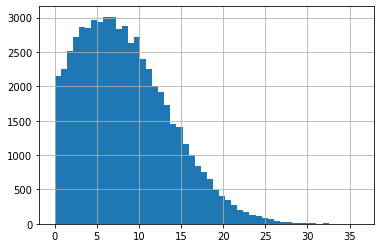

In [37]:
# Продолжительность звонков по тарифу ultra

calls_ultra = df.calls.join(df.users['tariff'], on='user_id').query('tariff == "ultra"')['duration']
print('Средняя продолжительность звонков:', calls_ultra.mean())
print('Дисперсия:', np.var(calls_ultra))
print('Стандартное отклонение:', np.std(calls_ultra))
calls_ultra.hist(bins=50);

Всего звонков: 58348
Среднее количество: 408.03
Медиана: 365.00
Дисперсия: 88222.82
Стандартное отклонение: 297.02


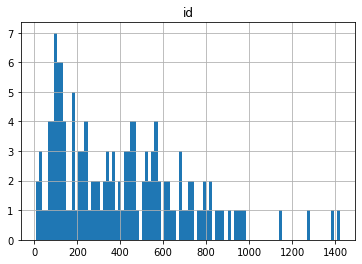

In [38]:
# Количество звонков каждого абонента тарифа ultra

calls_ultra_count = (
    df
    .calls
    .join(df.users['tariff'], on='user_id')
    .query('tariff == "ultra"')
    .pivot_table(index='user_id', values='id', aggfunc='count')
)    
print('Всего звонков: {}'.format(calls_ultra_count.sum()[-1]))
print('Среднее количество: {:.2f}'.format(calls_ultra_count.values.mean()))
print('Медиана: {:.2f}'.format(np.median(calls_ultra_count.values)))
print('Дисперсия: {:.2f}'.format(np.var(calls_ultra_count.values)))
print('Стандартное отклонение: {:.2f}'.format(np.std(calls_ultra_count.values)))
calls_ultra_count.hist(bins=100);

___Статистические показатели (средняя, дисперсия и стандартное отклонение) продолжительности звонков для обоих тарифов оказались очень похожи.___  

___Зато показатели количества звонков во втором тарифе значительно превосходят первый. Значит второй тариф чаще выбирают люди, которые любят говорить часто или у которых это связано с работой.___  

___Графики всех представленных выше выборок похожи на Пирсоновское распределение.___
***

Средняя продолжительность трафика: 385.5104208459601
Дисперсия: 56365.4139825921
Стандартное отклонение: 237.41401387153223


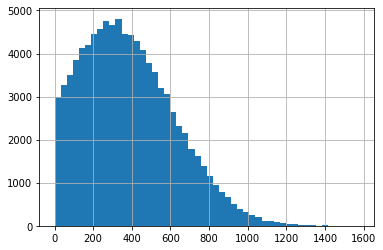

In [39]:
# Продолжительность интернет-трафика по тарифу smart

inet_smart = df.internet.join(df.users['tariff'], on='user_id').query('tariff == "smart"')['mb_used']
print('Средняя продолжительность трафика:', inet_smart.mean())
print('Дисперсия:', np.var(inet_smart))
print('Стандартное отклонение:', np.std(inet_smart))
inet_smart.hist(bins=50);

Всего интернет-сессий: 104646
Среднее количество: 299.85
Медиана: 257.00
Дисперсия: 38194.75
Стандартное отклонение: 195.43


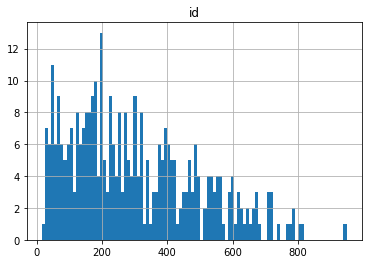

In [40]:
# Количество интернет-сессий абонентов тарифа smart

inet_smart_count = (
    df
    .calls
    .join(df.users['tariff'], on='user_id')
    .query('tariff == "smart"')
    .pivot_table(index='user_id', values='id', aggfunc='count')
)    
print('Всего интернет-сессий: {}'.format(inet_smart_count.sum()[-1]))
print('Среднее количество: {:.2f}'.format(inet_smart_count.values.mean()))
print('Медиана: {:.2f}'.format(np.median(inet_smart_count.values)))
print('Дисперсия: {:.2f}'.format(np.var(inet_smart_count.values)))
print('Стандартное отклонение: {:.2f}'.format(np.std(inet_smart_count.values)))
inet_smart_count.hist(bins=100);

Средняя продолжительность трафика: 531.4775547364336
Дисперсия: 73226.79638299302
Стандартное отклонение: 270.60450177887475


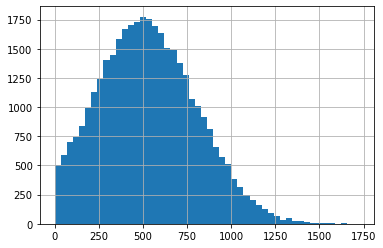

In [41]:
# Продолжительность интернет-трафика по тарифу ultra

inet_ultra = df.internet.join(df.users['tariff'], on='user_id').query('tariff == "ultra"')['mb_used']
print('Средняя продолжительность трафика:', inet_ultra.mean())
print('Дисперсия:', np.var(inet_ultra))
print('Стандартное отклонение:', np.std(inet_ultra))
inet_ultra.hist(bins=50);

Всего интернет-сессий: 58348
Среднее количество: 408.03
Медиана: 365.00
Дисперсия: 88222.82
Стандартное отклонение: 297.02


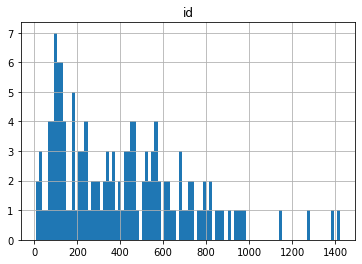

In [42]:
# Количество интернет-сессий абонентов тарифа ultra

inet_ultra_count = (
    df
    .calls
    .join(df.users['tariff'], on='user_id')
    .query('tariff == "ultra"')
    .pivot_table(index='user_id', values='id', aggfunc='count')
)    
print('Всего интернет-сессий: {}'.format(inet_ultra_count.sum()[-1]))
print('Среднее количество: {:.2f}'.format(inet_ultra_count.values.mean()))
print('Медиана: {:.2f}'.format(np.median(inet_ultra_count.values)))
print('Дисперсия: {:.2f}'.format(np.var(inet_ultra_count.values)))
print('Стандартное отклонение: {:.2f}'.format(np.std(inet_ultra_count.values)))
inet_ultra_count.hist(bins=100);

___Статистические показатели (средняя, дисперсия и стандартное отклонение) как количества сессий, так и потраченного интернет-трафика за сессию у пользователей двух тарифов оказались разными. Похоже, что абоненты тарифа ultra больше заточены на пользование интернетом.___  

___Все графики похожи на Пирсоновское распределение.___  
***

Всего сообщений: 74413
Среднее количество: 246.40
Медиана: 180.00
Дисперсия: 49291.47
Стандартное отклонение: 222.02


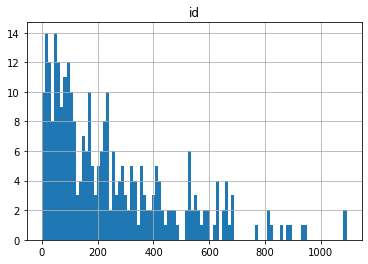

In [43]:
# Количество сообщений каждого абонента тарифа smart

msg_smart = (
    df
    .messages
    .join(df.users['tariff'], on='user_id')
    .query('tariff == "smart"')
    .pivot_table(index='user_id', values='id', aggfunc='count')
)    
print('Всего сообщений: {}'.format(msg_smart.sum()[-1]))
print('Среднее количество: {:.2f}'.format(msg_smart.values.mean()))
print('Медиана: {:.2f}'.format(np.median(msg_smart.values)))
print('Дисперсия: {:.2f}'.format(np.var(msg_smart.values)))
print('Стандартное отклонение: {:.2f}'.format(np.std(msg_smart.values)))
msg_smart.hist(bins=100);

Всего сообщений: 48623
Среднее количество: 392.12
Медиана: 295.50
Дисперсия: 110348.45
Стандартное отклонение: 332.19


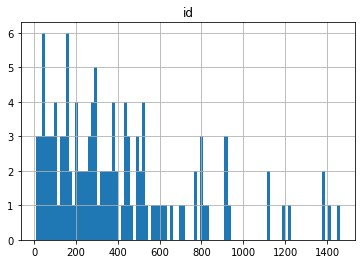

In [44]:
# Количество сообщений каждого абонента тарифа ultra

msg_ultra = (
    df
    .messages
    .join(df.users['tariff'], on='user_id')
    .query('tariff == "ultra"')
    .pivot_table(index='user_id', values='id', aggfunc='count')
)    
print('Всего сообщений: {}'.format(msg_ultra.sum()[-1]))
print('Среднее количество: {:.2f}'.format(msg_ultra.values.mean()))
print('Медиана: {:.2f}'.format(np.median(msg_ultra.values)))
print('Дисперсия: {:.2f}'.format(np.var(msg_ultra.values)))
print('Стандартное отклонение: {:.2f}'.format(np.std(msg_ultra.values)))

msg_ultra.hist(bins=100);

___Статистические показатели (средняя, дисперсия и стандартное отклонение) количества сообщений клиентов у абонентов двух тарифов значительно отличаются. Видно, что абоненты тарифа ultra намного больше делают рассылки сообщений. Напомню, что по этому тарифу лимит составляет 1000 сообщений, а по тарифу smart - 50.___  

___Распределение обоих графиков напоминает Пирсоновское.___  
***

# Шаг 4. Проверьте гипотезы

Проверка гипотез:  	
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформируем выборки с выручкой абонентов тарифов «Ультра» и «Смарт».  

Как уже говорилось ранее - общая выручка состоит из выручки за абонентскую плату + выручка за превышение лимита по звонкам + выручка зи превышение интернет-трафика + выручка превышение количество сообщений.  

Каждый абонент платит ежемесячную плату с момента регистрации и ежемесячно дополнительную плату за превышение лимитов, установленных условиями соответствующих тарифных планов.

In [45]:
def fee_per_year(row):
    rub_monthly_fee = get_parameter(row['tariff'], 'rub_monthly_fee')
    return (12 - row['month_reg'] + 1) * rub_monthly_fee

df.users['fee_per_year'] = df.users.apply(fee_per_year, axis=1)
df.users['fee_over_call'] = calls_pt['revenue_over']
df.users['fee_over_call'] = df.users['fee_over_call'].fillna(0)
df.users['fee_over_inet'] = internet_pt['revenue_over_inet']
df.users['fee_over_inet'] = df.users['fee_over_inet'].fillna(0)
df.users['fee_over_msg'] = messages_pt['revenue_over_msg']
df.users['fee_over_msg'] = df.users['fee_over_msg'].fillna(0)
df.users['fee_sum'] = df.users['fee_per_year'] + df.users['fee_over_call'] + df.users['fee_over_inet'] + df.users['fee_over_msg']
df.users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,fee_per_year,fee_over_call,fee_over_inet,fee_over_msg,fee_sum
user_id,,,,,,,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,15600,0.0,0.0,0.0,15600.0
1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,1100,0.0,800.0,0.0,1900.0
1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,3850,0.0,3400.0,0.0,7250.0
1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8,9750,0.0,0.0,0.0,9750.0
1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,15600,0.0,0.0,0.0,15600.0


#### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

$H_0$ = "средняя выручка пользователей тарифов «Ультра» и «Смарт» равны"   
$H_1$ = "средняя выручка пользователей тарифов «Ультра» и «Смарт» различны" 

In [46]:
fee_smart = df.users.query('tariff == "smart"')['fee_sum']
fee_ultra = df.users.query('tariff == "ultra"')['fee_sum']

In [47]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(fee_smart, fee_ultra, equal_var=False)

print('p-значение:', results.pvalue / 2)

if (results.pvalue / 2 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 2.0510964344659314e-17
Отвергаем нулевую гипотезу


С очень большой вероятностью средние двух генеральных совокупностей, представленных этими двумя выборками, различны.  
В общем-то, мы ранее уже подсчетом общей комиссии по тарифам (где смарт оказался предпочтительней) пришли к тому же выводу.

In [55]:
describes1 = fee_smart.describe().to_frame()
describes1.columns = ['smart']
describes1['ultra'] = fee_ultra.describe()

describes1

,smart,ultra
count,351.000000,149.000000
mean,8108.162393,13975.167785
std,5376.084138,7020.555303
min,550.000000,1950.000000
25%,4073.500000,7800.000000
50%,7174.000000,13800.000000
75%,11007.000000,19500.000000
max,28300.000000,32550.000000


#### Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

$H_0$ = "средняя выручка пользователей из Москвы и пользователей других регионов равны"   
$H_1$ = "средняя выручка пользователей из Москвы и пользователей других регионов различны" 

In [48]:
fee_moscow = df.users.query('city == "Москва"')['fee_sum']
fee_no_moscow = df.users.query('~(city == "Москва")')['fee_sum']

In [49]:

alpha = 0.05
results = st.ttest_ind(fee_moscow, fee_no_moscow, equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6391544848345182
Не получилось отвергнуть нулевую гипотезу


В данном случае мы не можем сказать, что пользователи из Москвы больше платят за услуги оператора.

# Шаг 5. Общий вывод


Нам были предоставлены данные по 500 абонентам двух разных тарифных планов оператора сотовой связи, зарегистрированных в 2018 г.

По этим данным необходимо было составить вывод - какой тариф лучше.

После предварительной обработки данных (очищение нулевых данных, преобразования некоторых типов данных) был проведен следующий анализ: общая выручка по двум тарифам, статистические показатели, графики распределения по разным параметрам, проверка гипотез.

Выводы:

Определенно, выборки с тарифом смарт и тарифом ультра представляют разные совокупности.  

И хотя многие показатели по тарифу смарт оказалась лучше, чем у тарифа ультра (количество привлеченных клиентов, общая выручка), нельзя однозначно сказать, что первый тариф лучше второго.  
Они направлены на разные целевые аудитории!  
Так пользователи второго тарифа больше отправляют сообщений, делают большее количество звонков и расходуют больший интернет-трафик. Но по условиям данного тарифа лимит на данные услуги намного больше, чем в первом тарифе, вот пользователи и пытаются "выжать" по полной, раз уж заплатили высокую абонентскую плату.  
И возможно этих бы пользовтелей вообще бы не привлекли, если бы не было этого тарифа.  

Для более качественного вывода нужно анализировать и другие показатели. 
Например, насколько полно клиенты используют лимиты, которые заданы по условиям тарифа (т.е. клиент заплатил за 3000 мин.разговора, а использовал только 1000).  
